## 🧬 COVID-19 Genom Analizi ve Görselleştirme

In [1]:
import matplotlib.pyplot as plt
from Bio.Seq import Seq

In [2]:
# --- 1. VERİ HAZIRLIĞI (SARS-CoV-2 Genom Parçası) ---
# Gerçek hayatta bunu NCBI veritabanından çekeriz. 
# Örnek olarak virüsün "Spike Protein" bölgesinin bir kısmını alıyoruz.
# (Bu veri, virüsün hücreye yapışmasını sağlayan kısımdır).


covid_spike_dna = Seq("ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGG")

print(f"Analiz edilen DNA dizisi uzunluğu: {len(covid_spike_dna)} baz çifti")

Analiz edilen DNA dizisi uzunluğu: 1239 baz çifti


In [3]:
# --- 2. ALGORİTMA: SLIDING WINDOW (Kayan Pencere) ---
# Genomun boyu boyunca küçük bir pencere (örn: 100 harf) kaydırarak
# her bölgenin GC oranını hesaplayacağız.

pencere_boyutu = 100
adim_sayisi = 50 # Pencere her seferinde 50 harf kayacak
gc_degerleri = []

for i in range(0, len(covid_spike_dna) - pencere_boyutu, adim_sayisi):
    alt_dizi = covid_spike_dna[i : i + pencere_boyutu]
    g_sayisi = alt_dizi.count("G")
    c_sayisi = alt_dizi.count("C")
    gc_yuzdesi = (g_sayisi + c_sayisi) / pencere_boyutu * 100
    gc_degerleri.append(gc_yuzdesi)

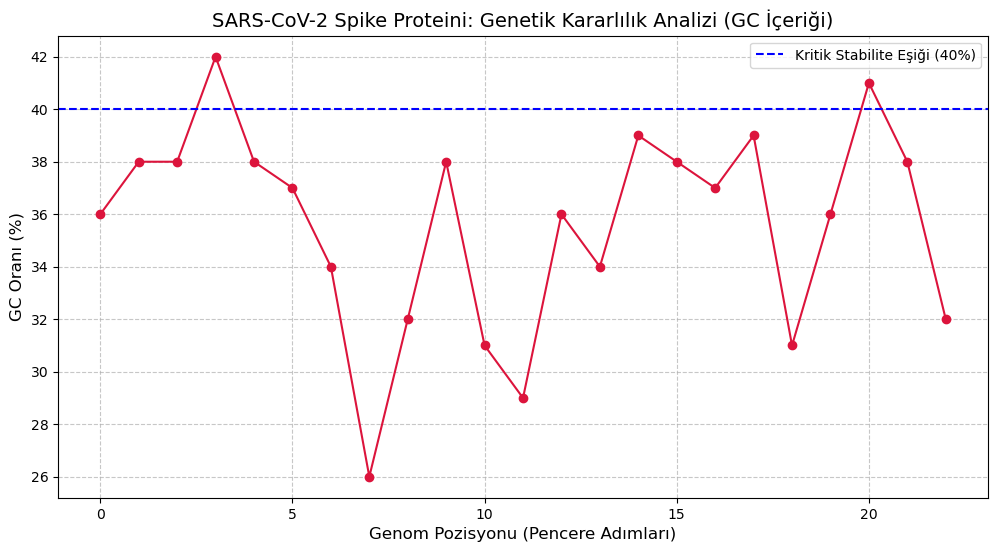

In [4]:
# --- 3. GÖRSELLEŞTİRME (DATA SCIENCE) ---
# Matplotlib ile sonuçları grafiğe dökelim.

plt.figure(figsize=(12, 6))
plt.plot(gc_degerleri, marker='o', color='crimson', linestyle='-')

plt.title('SARS-CoV-2 Spike Proteini: Genetik Kararlılık Analizi (GC İçeriği)', fontsize=14)
plt.xlabel('Genom Pozisyonu (Pencere Adımları)', fontsize=12)
plt.ylabel('GC Oranı (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.axhline(y=40, color='blue', linestyle='--', label='Kritik Stabilite Eşiği (40%)')
plt.legend()

plt.show()

### - Zirveler (Yüksek GC): Virüsün ısıya dayanıklı, zor mutasyon geçiren bölgeleri. İlaç şirketleri aşı yaparken burayı hedefler!

### - Dipleri (Düşük GC): Virüsün kararsız, hızlı mutasyon geçirebilecek bölgeleri.